In [1]:
#The path file assumes you have a directory structure with cmdstanpy sitting at the top with subdirectories 
from paths import *

The route directory: direc: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\
Will get code from: codepath: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\code
Will send code to: outpath: C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\output
If data is needed it will look in: datapath:  C:\Users\n_1ho\Documents\biodiversity_model_final_kelvin\cmdstanpy\data


In [2]:
import cmdstanpy
from cmdstanpy import CmdStanModel
from stancodes import *  #This file is in the code directory, is in the code directory

In [3]:
#Compile the HB stan code, will only do this once
stan_file = join(codepath,'HBL5.stan')
model = CmdStanModel(stan_file=stan_file)

In [4]:
sys.path.append(datapath)
from bio3loadindata3 import *

In [5]:
x=[array(X0_30),array(X1_30),array(X2_30)]
#for i in range(3):
    #x[i][:,1:-1]=x[i][:,1:-1]/60
    #x[i][:,0]=x[i][:,0]/5

In [6]:
x[1]

array([[-0.01      ,  0.75      ,  0.75      , ...,  0.25      ,
         0.        ,  0.        ],
       [-1.        ,  0.41666667,  1.        , ...,  0.75      ,
         1.        ,  0.        ],
       [-0.4       ,  0.        ,  0.25      , ...,  1.        ,
         0.41666667,  0.        ],
       ...,
       [-0.05      ,  0.58333333,  1.        , ...,  0.41666667,
         0.75      ,  0.        ],
       [-0.1       ,  0.16666667,  0.        , ...,  1.        ,
         0.75      ,  0.        ],
       [-0.05      ,  1.        ,  0.        , ...,  0.        ,
         0.75      ,  0.        ]])

In [7]:
Y=y30+1
ids=id30
N=int(max(ids))
T=len(Y)
K=shape(X0_30)[1]
[N,T,K]

[201, 1608, 7]

In [8]:
frame(x[1])

,0,1,2,3,4,5,6
0,-0.01,0.750000,0.750000,1.000000,0.250000,0.000000,0.0
1,-1.00,0.416667,1.000000,0.416667,0.750000,1.000000,0.0
2,-0.40,0.000000,0.250000,1.000000,1.000000,0.416667,0.0
3,-0.10,0.166667,0.000000,0.250000,1.000000,0.750000,0.0
4,-1.00,0.583333,0.166667,0.750000,0.416667,0.250000,0.0
...,...,...,...,...,...,...,...
1603,-0.30,1.000000,0.250000,0.000000,1.000000,1.000000,0.0
1604,-0.30,0.583333,0.000000,1.000000,0.250000,0.000000,0.0
1605,-0.05,0.583333,1.000000,0.416667,0.416667,0.750000,0.0
1606,-0.10,0.166667,0.000000,0.250000,1.000000,0.750000,0.0


In [9]:
ages=socio['age group']
incomes=socio['income']
sizes=socio['household']
gender=socio['gender']
edus=socio['education']
location=socio['borough']


agelist=sorted(list(set(ages)))

incomelist = [
    'less than £15,000',
    '£15,001 - £18,000',
    '£18,001 - £21,000',
    '£21,001 - £25,000',
    '£25,001 - £30,000',
    '£30,001 - £35,000',
    '£35,001 - £40,000',
    '£40,001 - £45,000',
    '£45,001 - £52,000',
    '£52,001 - £60,000',
    '£60,001 - £70,000',
    '£70,001 - £80,000',
    '£80,001 - £100,000',
    'Greater than £100,000',
    'Prefer not to say'
]
sizelist=sorted(list(set(sizes)))

#['18-25', '26-35', '36-45', '46-55', '56-65', '>65', 'Prefer not to say']


age0=(ages==agelist[0]).astype(int)*20
age1=(ages==agelist[1]).astype(int)*30
age2=(ages==agelist[2]).astype(int)*40
age3=(ages==agelist[3]).astype(int)*50
age4=(ages==agelist[4]).astype(int)*60
age5=(ages==agelist[5]).astype(int)*70
age6=(ages==agelist[6]).astype(int)*40

age=age0+age1+age2+age3+age4+age5+age6
age=age/100


#['less than £15,000', '£15,001 - £18,000', '£18,001 - £21,000', '£21,001 - £25,000', '£25,001 - £30,000', '£30,001 - £35,000', '£35,001 - £40,000', '£40,001 - £45,000', '£45,001 - £52,000', '£52,001 - £60,000', '£60,001 - £70,000', '£70,001 - £80,000', '£80,001 - £100,000', 'Greater than £100,000', 'Prefer not to say']

ilist=[12000,16500,19500,23000,27500,32500,37500,42500,48500,56000,65000,75000,90000,110000,37500]

income0=(incomes==incomelist[0]).astype(int)*ilist[0]
income1=(incomes==incomelist[1]).astype(int)*ilist[1]
income2=(incomes==incomelist[2]).astype(int)*ilist[2]
income3=(incomes==incomelist[3]).astype(int)*ilist[3]
income4=(incomes==incomelist[4]).astype(int)*ilist[4]
income5=(incomes==incomelist[5]).astype(int)*ilist[5]
income6=(incomes==incomelist[6]).astype(int)*ilist[6]
income7=(incomes==incomelist[7]).astype(int)*ilist[7]
income8=(incomes==incomelist[8]).astype(int)*ilist[8]
income9=(incomes==incomelist[9]).astype(int)*ilist[9]
income10=(incomes==incomelist[10]).astype(int)*ilist[10]
income11=(incomes==incomelist[11]).astype(int)*ilist[11]
income12=(incomes==incomelist[12]).astype(int)*ilist[12]
income13=(incomes==incomelist[13]).astype(int)*ilist[13]
income14=(incomes==incomelist[14]).astype(int)*ilist[14]

income = income0 + income1 + income2 + income3 + income4 + income5 + income6 + income7 + income8 + income9 + income10 + income11 + income12 + income13 + income14
log_income = np.log(income)

#['1-3', '4-6', '7-9', '10 or more', 'Prefer not to say']


#size0=(sizes==sizelist[0]).astype(int)*30
#size1=(sizes==sizelist[1]).astype(int)*60
#size2=(sizes==sizelist[2]).astype(int)*40
#size3=(sizes==sizelist[3]).astype(int)*50
#size4=(sizes==sizelist[4]).astype(int)*40

#size=size0+size1+size2+size3+size4
#size=size/100

#gender=(socio['gender']=='Female').astype(int)

edu = socio['education'].isin([
    'Tertiary - undergraduate',
    'Tertiary - postgraduate taught e.g. MSc, MA',
    'Tertiary - postgraduate research e.g. MRes, PhD'
]).astype(int)

#location = (socio['borough']=='Manchester').astype(int)

#size= socio['household'].isin([
    #'4-6',
    #'7-9',
    #'10 or more',
    #'Prefer not to say'
#]).astype(int)

demog=cc([age,log_income,edu])
demog=demog-demog.mean()


#frame(age).plot(kind='hist')

#frame(gender).plot(kind='hist',bins=20)
#agelist
#incomelist

In [10]:
# my covariates
X = pd.DataFrame({
    'Age': age,
    'Log_Income': log_income,
    'Edu tertiary': edu
})

In [11]:
corr_matrix = X.corr()
print(corr_matrix)

                   Age  Log_Income  Edu tertiary
Age           1.000000   -0.119544     -0.205497
Log_Income   -0.119544    1.000000      0.256209
Edu tertiary -0.205497    0.256209      1.000000


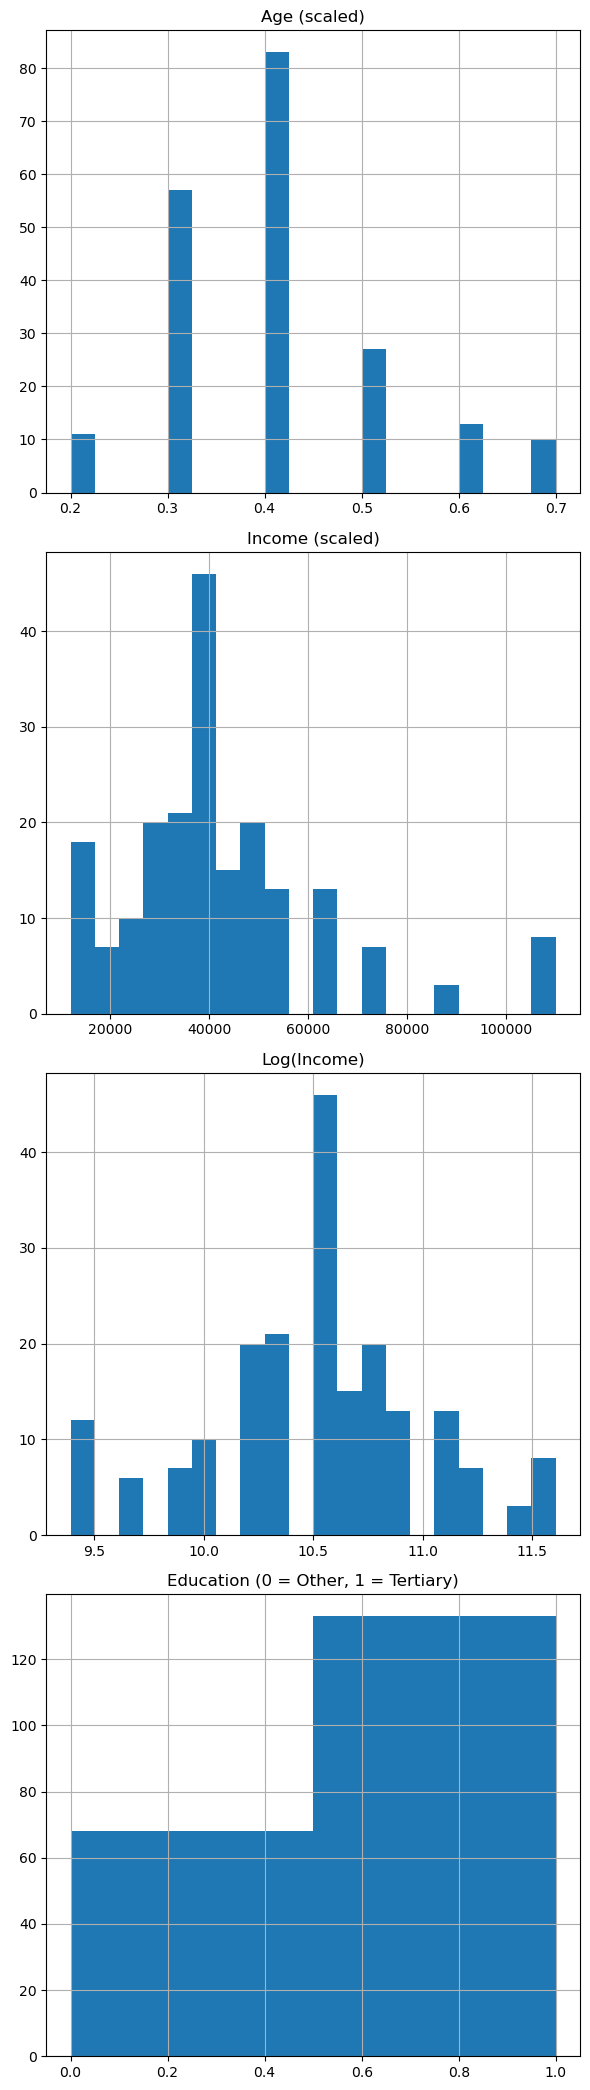

In [12]:
import matplotlib.pyplot as plt
from pandas import DataFrame as frame

fig, ax = plt.subplots(4, figsize=(6, 21))  # 4 plots now

# Age
frame(age).hist(ax=ax[0], bins=20)
ax[0].set_title("Age (scaled)")

# Income (scaled)
frame(income).hist(ax=ax[1], bins=20)
ax[1].set_title("Income (scaled)")

# Log Income
frame(log_income).hist(ax=ax[2], bins=20)
ax[2].set_title("Log(Income)")

# Household size
#frame(size).hist(ax=ax[3], bins=2)
#ax[3].set_title("Household Size (0 = 1-3, 1 = 4 and greater)")

# Gender
#frame(gender).hist(ax=ax[3], bins=2)
#ax[3].set_title("Gender (0 = Male, 1 = Female)")

# Education
frame(edu).hist(ax=ax[3], bins=2)
ax[3].set_title("Education (0 = Other, 1 = Tertiary)")

# Borough location
#frame(location).hist(ax=ax[4], bins=2)
#ax[4].set_title("Borough (0 = Other, 1 = Manchester)")

plt.tight_layout()
plt.show()


In [13]:
print(pd.DataFrame({'Original': edus, 'Mapped': edu}).drop_duplicates())

                                            Original  Mapped
1    Tertiary - postgraduate research e.g. MRes, PhD       1
2                                          Secondary       0
3        Tertiary - postgraduate taught e.g. MSc, MA       1
4                                  Prefer not to say       0
5                           Tertiary - undergraduate       1
10                                           Primary       0
16                     Non-vocational qualifications       0
19                                             Other       0
139                              No formal education       0


In [14]:
# Check which categories were mapped to which numeric values
#print(pd.DataFrame({'Original': sizes, 'Mapped': size}).drop_duplicates())

In [15]:
pd.DataFrame({'Original': incomes, 'Mapped': income}).drop_duplicates()

,Original,Mapped
1,"£30,001 - £35,000",32500
2,"less than £15,000",12000
3,"£35,001 - £40,000",37500
4,"£45,001 - £52,000",48500
10,Prefer not to say,37500
11,"£70,001 - £80,000",75000
12,"£52,001 - £60,000",56000
16,"£25,001 - £30,000",27500
23,"£40,001 - £45,000",42500
24,"£60,001 - £70,000",65000


In [16]:
pd.DataFrame({'Original': ages, 'Mapped': age}).drop_duplicates()

,Original,Mapped
1,36-45,0.4
2,26-35,0.3
3,46-55,0.5
10,Prefer not to say,0.4
11,>65,0.7
22,18-25,0.2
23,56-65,0.6


In [17]:
from shortercuts import rc
y=squeeze(array(findex(rc([y30+1]))))
card=squeeze(array(findex(rc([card30]))))
ids=squeeze(array(findex(rc([id30]))))
X0=array(findex(rc([X0_30])))
X1=array(findex(rc([X1_30])))
X2=array(findex(rc([X2_30])))
x=[X0,X1,X2]
Z=array(demog)
J=demog.shape[1]

In [18]:
beta_mean=[0,0,0,0,0]    #prior mean for the wtp parameters
alpha_mean=0                 #prior mean for the scale parameters : note that this is the log or the scale
theta_mean=0                 #prior mean for the opt-out parameters

s=.3
beta_sigma=[s,s,s,s,s]     #prior std for the mean of beta   -wtps
alpha_sigma=1              #prior std for the mean if alpha -scale
theta_sigma=s              #prior std for the mean of theta -opt out

t=0.05
a=[1,1,1,1,1]              #These are gammma priors for the heterogeneous WTPs: 
b=[t,t,t,t,t]       #These are gammma priors for the heterogeneous WTPs: note that mean=a/b and var =a/b**2
a_alpha=1; b_alpha=t;         #These are gammma priors for the heterogeneous scale parameter
a_theta=1; b_theta=t;         #These are gammma priors for the heterogeneous opt out parameters

hdata = {'M': 3, 'N': N, 'K':K, 'T': rows(Y) , 'y': Y, 'ids': ids, 'x':x, 'J':J, 'Z':Z, 
         'beta_mean':beta_mean,'beta_sigma':beta_sigma,
         'alpha_mean':alpha_mean,'alpha_sigma':alpha_sigma,
         'theta_mean':theta_mean,'theta_sigma':theta_sigma,
         'a':a,'b':b,'a_alpha':a_alpha,'b_alpha':b_alpha,'a_theta':a_theta,'b_theta':b_theta, 
         'lower_precision_beta_ivar':  1, #The larger these are the greater the hommogeneity enforced
         'lower_precision_alpha_ivar': 1, #The larger these are the greater the hommogeneity enforced
         'lower_precision_theta_ivar': 1, #The larger these are the greater the hommogeneity enforced
         'lower_beta_bound':-1,           #If the parameters exceed this then this attributes wtp exceeds the largest payment
         'upper_beta_bound': 1,
         'lower_theta_bound':-1,
         'upper_theta_bound':1}

In [19]:
#Out of interest get the maximum likelihood estimates of beta_mu
import time
start=time.time()
mle = model.optimize(data=hdata)
q=mle.stan_variables()
end=time.time()
print('time taken in mins', (end-start)/60,'seconds', end-start)
#q['beta']

17:08:44 - cmdstanpy - INFO - Chain [1] start processing
17:08:49 - cmdstanpy - INFO - Chain [1] done processing
17:08:49 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
17:08:49 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
17:08:49 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
17:08:49 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
17:08:49 - cmdstanpy - WARNING - The default behavior of CmdStanMLE.stan_variable() will change in a future release to always return a numpy.ndarray, even for scalar variables.
17

time taken in mins 0.08714375893274943 seconds 5.228625535964966


In [20]:
print(hdata.keys())

dict_keys(['M', 'N', 'K', 'T', 'y', 'ids', 'x', 'J', 'Z', 'beta_mean', 'beta_sigma', 'alpha_mean', 'alpha_sigma', 'theta_mean', 'theta_sigma', 'a', 'b', 'a_alpha', 'b_alpha', 'a_theta', 'b_theta', 'lower_precision_beta_ivar', 'lower_precision_alpha_ivar', 'lower_precision_theta_ivar', 'lower_beta_bound', 'upper_beta_bound', 'lower_theta_bound', 'upper_theta_bound'])


In [21]:
#Here we are going to use pathfinder to get some starting points
from cmdstanpy.model import cmdstan_path
pathfinder = model.pathfinder(data=hdata)

17:08:54 - cmdstanpy - INFO - Chain [1] start processing
17:13:29 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
#We are going to run 6 chains
chains=6
pathfinder_inits = pathfinder.create_inits(chains=chains)

In [23]:
#Lets fit the model using the intitialiser from pathfinder
'''
A reminder of all the possible settings
sample(data=None, chains=None, parallel_chains=None, threads_per_chain=None, seed=None, chain_ids=None, inits=None, 
iter_warmup=None, iter_sampling=None, save_warmup=False, thin=None, max_treedepth=None, metric=None, 
step_size=None, adapt_engaged=True, adapt_delta=None, adapt_init_phase=None, adapt_metric_window=None, 
adapt_step_size=None, fixed_param=False, output_dir=None, sig_figs=None, save_latent_dynamics=False, 
save_profile=False, show_progress=True, show_console=False, refresh=None, time_fmt='%Y%m%d%H%M%S', 
timeout=None, *, force_one_process_per_chain=None)
'''
chains=6
start=time.time()
fit=model.sample(data=hdata, chains=chains,iter_warmup=1000, inits=pathfinder_inits,
                 iter_sampling=2000, show_progress=True,output_dir=None,thin=1,adapt_delta=.8,max_treedepth=14)
end=time.time()
print('time taken in mins', (end-start)/60,'seconds', end-start)

17:13:51 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

17:41:00 - cmdstanpy - INFO - CmdStan done processing.
17:41:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'HBL5.stan', line 97, column 0 to column 36)
Consider re-running with show_console=True if the above output is unclear!


17:41:30 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 2 divergent transitions (0.1%)
	Chain 6 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


time taken in mins 27.65996168057124 seconds 1659.5977008342743


In [24]:
#fit.summary()

In [25]:
z=fit.stan_variables()

In [26]:
outpath='C:\\Users\\n_1ho\\Documents\\biodiversity_model_final_kelvin\\cmdstanpy\\output'  #if you want to change the output
savemodel(z,join(outpath,'z_niko1loadindata3_rescale_Z_DCE1_withage_loginc_edutert_arviz_20251019'))

In [27]:
outpath='C:\\Users\\n_1ho\\Documents\\biodiversity_model_final_kelvin\\cmdstanpy\\output'  #if the outpath was change
z=loadmodel(join(outpath,'z_niko1loadindata3_rescale_Z_DCE1_withage_loginc_edutert_arviz_20251019'))


<Axes: title={'center': 'Opt Out ASC'}>

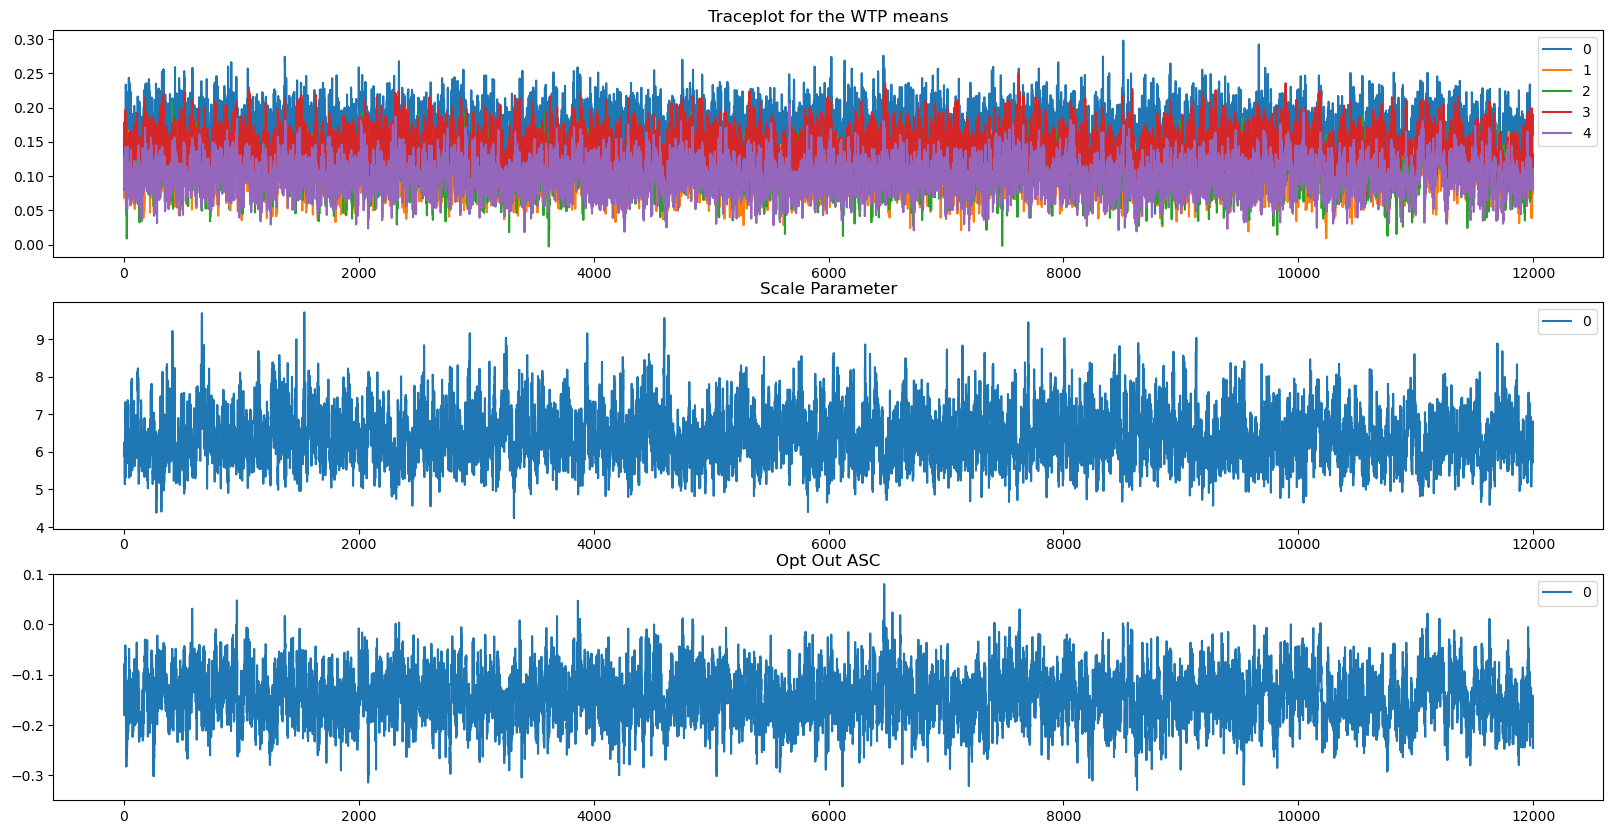

In [28]:
from shortercuts import pltsize
pltsize(10,20)
fig,ax=plt.subplots(3)
frame(z['beta_mu']).plot(title='Traceplot for the WTP means',ax=ax[0])
frame(exp(z['alpha_mu'])).plot(ax=ax[1],title='Scale Parameter')
frame(z['theta_mu']).plot(ax=ax[2],title='Opt Out ASC')

In [29]:
#print(fit.diagnose())

In [30]:
print(z.keys())

dict_keys(['beta', 'beta_mu', 'beta_ivar', 'alpha', 'alpha_mu', 'alpha_ivar', 'theta', 'theta_mu', 'theta_ivar', 'demog_beta_coeffs', 'demog_theta_coeffs', 'mu', 'coef', 'beta_std', 'alpha_std', 'theta_std', 'beta_mu_ind', 'theta_mu_ind', 'log_lik'])


In [32]:
#demographics=frame(z['beta_mu_ind'])
#demographics.columns=['Gender','Age','Income','Household size','Tertiary Edu','Distance_med','Distance_high']

#demographics.describe()

In [33]:
#pltsize(10,15)
#fig,ax=plt.subplots(3,2)

#(frame(z['beta_mu'])[0]).plot(kind='hist',bins=100,ax=ax[0,0],title='Gender',grid=True)
#frame(z['beta_mu'])[1].plot(kind='hist',bins=100,ax=ax[0,1],title='Age',grid=True)
#frame(z['beta_mu'])[2].plot(kind='hist',bins=100,ax=ax[1,0],title='Income',grid=True)
#frame(z['beta_mu'])[3].plot(kind='hist',bins=100,ax=ax[1,1],title='Household size',grid=True)
#frame(z['beta_mu'])[4].plot(kind='hist',bins=100,ax=ax[2,0],title='Teriary Edu',grid=True)
#frame(z['beta_mu'])[5].plot(kind='hist',bins=100,ax=ax[2,1],title='Distance_med',grid=True)
#frame(z['beta_mu'])[6].plot(kind='hist',bins=100,ax=ax[2,1],title='Distance_high',grid=True)
#frame(z['theta_mu'])[7].plot(kind='hist',bins=100,ax=ax[2,1],title='WTP to avoid SQ',grid=True)
#frame(z['rho']).plot(kind='hist',bins=100)

In [34]:
beta_mu= (5/60)*100*frame(z['beta_mu'])
theta_mu= 5*100*frame(z['theta_mu'])
beta_mu.columns=['bees','sparrow','butterflies','hedgehogs','bats']
varnames=beta_mu.columns

cc([beta_mu.describe(),theta_mu.describe()]).round(2)


,bees,sparrow,butterflies,hedgehogs,bats,0
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,1.38,0.81,0.92,1.19,0.83,-72.04
std,0.26,0.18,0.23,0.22,0.20,25.16
min,0.35,0.08,-0.02,0.43,0.15,-164.48
25%,1.21,0.68,0.77,1.04,0.69,-89.15
50%,1.38,0.80,0.92,1.19,0.83,-72.16
75%,1.56,0.93,1.07,1.33,0.97,-55.09
max,2.48,1.61,1.73,2.08,1.71,39.99


In [35]:
beta_mu= 5*100*frame(z['beta_mu'])
theta_mu= 5*100*frame(z['theta_mu'])
beta_mu.columns=['bees','sparrow','butterflies','hedgehogs','bats']
varnames=beta_mu.columns

cc([beta_mu.describe(),theta_mu.describe()]).round(2)

,bees,sparrow,butterflies,hedgehogs,bats,0
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,82.87,48.37,55.08,71.20,49.80,-72.04
std,15.69,10.95,13.54,12.91,12.26,25.16
min,21.12,4.66,-1.24,26.00,9.17,-164.48
25%,72.50,40.94,45.92,62.46,41.50,-89.15
50%,82.98,48.23,55.26,71.17,49.69,-72.16
75%,93.35,55.77,64.28,79.96,57.96,-55.09
max,148.82,96.56,103.74,124.84,102.60,39.99


In [36]:
# 95% credible intervals (2.5% and 97.5%)
beta_ci = beta_mu.quantile([0.025, 0.975]).T
theta_ci = theta_mu.quantile([0.025, 0.975]).T

# Optional: rename columns for clarity
beta_ci.columns = ['2.5%', '97.5%']
theta_ci.columns = ['2.5%', '97.5%']

# Round and display
print("Credible Intervals for beta_mu:")
print(beta_ci.round(2))
print("\nCredible Intervals for theta_mu:")
print(theta_ci.round(2))

Credible Intervals for beta_mu:
              2.5%   97.5%
bees         52.02  113.36
sparrow      27.26   70.19
butterflies  28.22   81.60
hedgehogs    46.23   96.73
bats         25.69   73.81

Credible Intervals for theta_mu:
     2.5%  97.5%
0 -120.43 -22.44


<Axes: title={'center': 'WTP  to avoid SQ'}, ylabel='Frequency'>

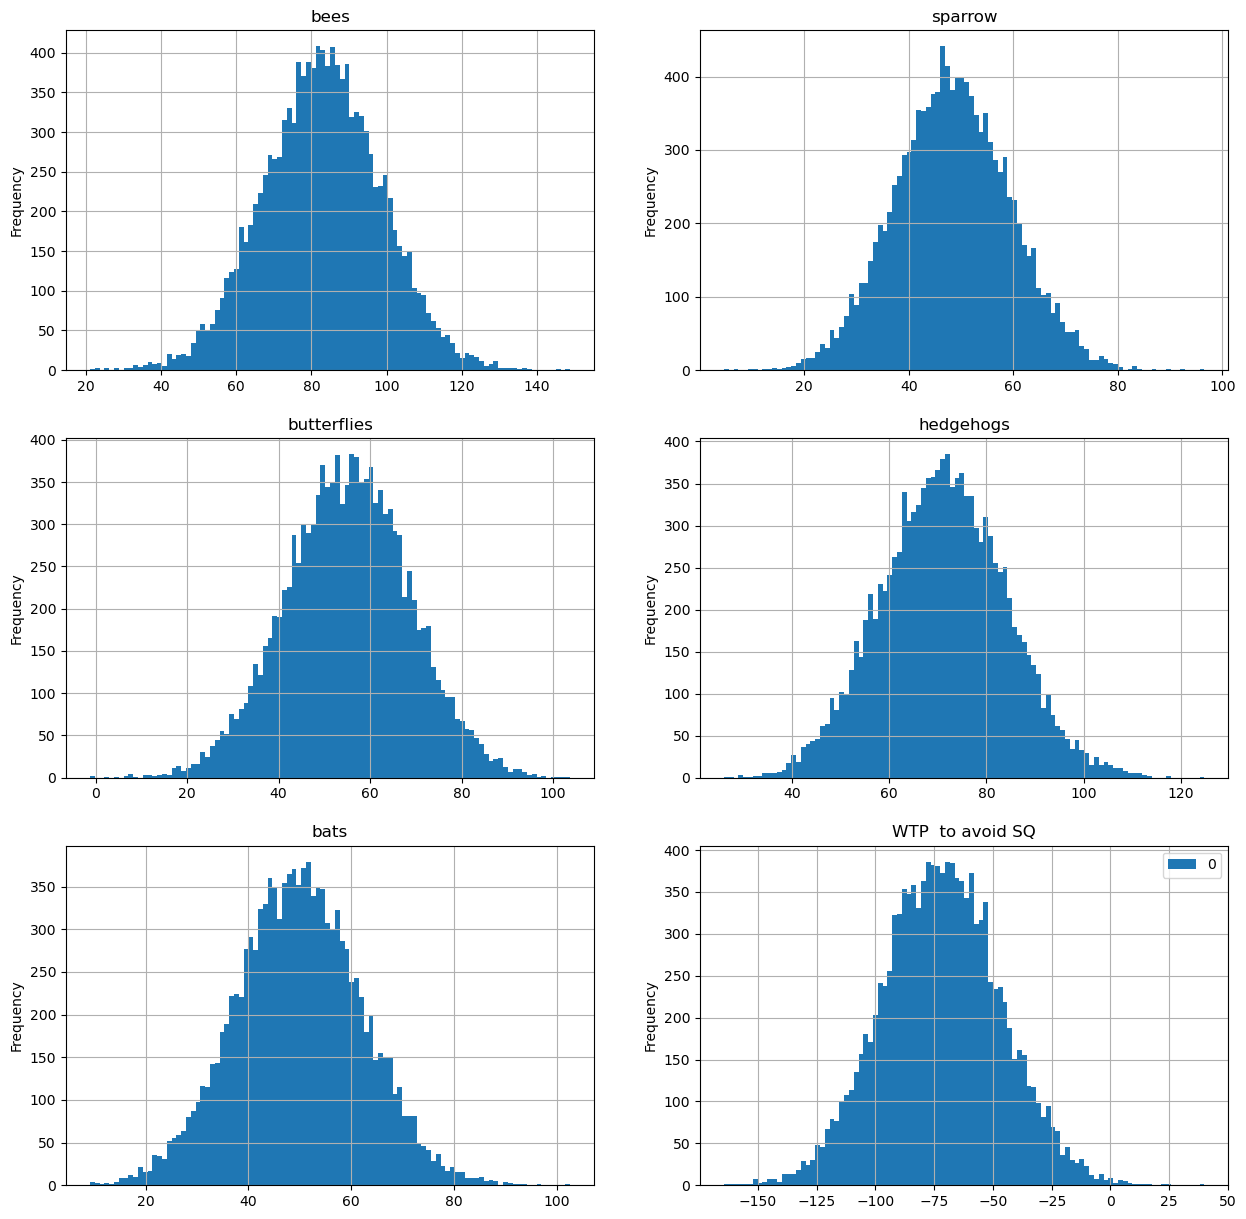

In [37]:
pltsize(15,15)
fig,ax=plt.subplots(3,2)
scale=1
(scale*beta_mu[varnames[0]]).plot(kind='hist',bins=100,ax=ax[0,0],title=varnames[0],grid=True)
(scale*beta_mu[varnames[1]]).plot(kind='hist',bins=100,ax=ax[0,1],title=varnames[1],grid=True)
(scale*beta_mu[varnames[2]]).plot(kind='hist',bins=100,ax=ax[1,0],title=varnames[2],grid=True)
(scale*beta_mu[varnames[3]]).plot(kind='hist',bins=100,ax=ax[1,1],title=varnames[3],grid=True)
(scale*beta_mu[varnames[4]]).plot(kind='hist',bins=100,ax=ax[2,0],title=varnames[4],grid=True)
(scale*theta_mu).plot(kind='hist',grid=True,bins=100,ax=ax[2,1],title='WTP  to avoid SQ')


In [38]:
import arviz as az
idata = az.from_cmdstanpy(posterior=fit)
az.summary(idata, var_names=["demog_beta_coeffs"], round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"demog_beta_coeffs[0, 0]",-0.10,0.27,-0.62,0.39,0.01,0.0,2657.13,5971.30,1.00
"demog_beta_coeffs[0, 1]",-0.09,0.19,-0.46,0.28,0.00,0.0,2057.60,4062.95,1.00
"demog_beta_coeffs[0, 2]",-0.14,0.23,-0.57,0.30,0.01,0.0,1691.98,3790.71,1.00
"demog_beta_coeffs[0, 3]",-0.12,0.22,-0.53,0.29,0.01,0.0,1563.65,3334.69,1.00
"demog_beta_coeffs[0, 4]",0.05,0.21,-0.33,0.45,0.01,0.0,1570.63,3901.06,1.00
"demog_beta_coeffs[1, 0]",-0.01,0.06,-0.13,0.11,0.00,0.0,3253.41,6540.84,1.00
"demog_beta_coeffs[1, 1]",-0.00,0.04,-0.08,0.08,0.00,0.0,2453.77,4640.39,1.00
"demog_beta_coeffs[1, 2]",0.01,0.05,-0.10,0.11,0.00,0.0,1526.35,3445.24,1.00
"demog_beta_coeffs[1, 3]",-0.05,0.05,-0.14,0.05,0.00,0.0,1226.29,3117.63,1.01
"demog_beta_coeffs[1, 4]",-0.04,0.05,-0.13,0.05,0.00,0.0,1599.97,3845.84,1.00


In [39]:
# Verify the dimensional structure
idata.posterior["demog_beta_coeffs"].shape

(6, 2000, 3, 5)

In [40]:
# Define readable names
socio_vars = ["Age", "Log income","Edu tertiary"]
attr_names = ["Bumblebees", "Sparrows", "Butterfiles", "Hedgehogs", "Bats"]

# Extract summary table
summary = az.summary(idata, var_names=["demog_beta_coeffs"], round_to=2)

# Add labels
summary["Socio_var"] = [socio_vars[i // len(attr_names)] for i in range(len(summary))]
summary["Attribute"] = [attr_names[i % len(attr_names)] for i in range(len(summary))]

# Clean table
summary = summary[["Socio_var", "Attribute", "mean", "sd", "hdi_3%", "hdi_97%"]]
summary.columns = ["Socio variable", "Attribute", "Mean", "SD", "2.5%", "97.5%"]

print(summary)

                        Socio variable    Attribute  Mean    SD  2.5%  97.5%
demog_beta_coeffs[0, 0]            Age   Bumblebees -0.10  0.27 -0.62   0.39
demog_beta_coeffs[0, 1]            Age     Sparrows -0.09  0.19 -0.46   0.28
demog_beta_coeffs[0, 2]            Age  Butterfiles -0.14  0.23 -0.57   0.30
demog_beta_coeffs[0, 3]            Age    Hedgehogs -0.12  0.22 -0.53   0.29
demog_beta_coeffs[0, 4]            Age         Bats  0.05  0.21 -0.33   0.45
demog_beta_coeffs[1, 0]     Log income   Bumblebees -0.01  0.06 -0.13   0.11
demog_beta_coeffs[1, 1]     Log income     Sparrows -0.00  0.04 -0.08   0.08
demog_beta_coeffs[1, 2]     Log income  Butterfiles  0.01  0.05 -0.10   0.11
demog_beta_coeffs[1, 3]     Log income    Hedgehogs -0.05  0.05 -0.14   0.05
demog_beta_coeffs[1, 4]     Log income         Bats -0.04  0.05 -0.13   0.05
demog_beta_coeffs[2, 0]   Edu tertiary   Bumblebees -0.00  0.07 -0.14   0.13
demog_beta_coeffs[2, 1]   Edu tertiary     Sparrows  0.00  0.05 -0.09   0.10

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

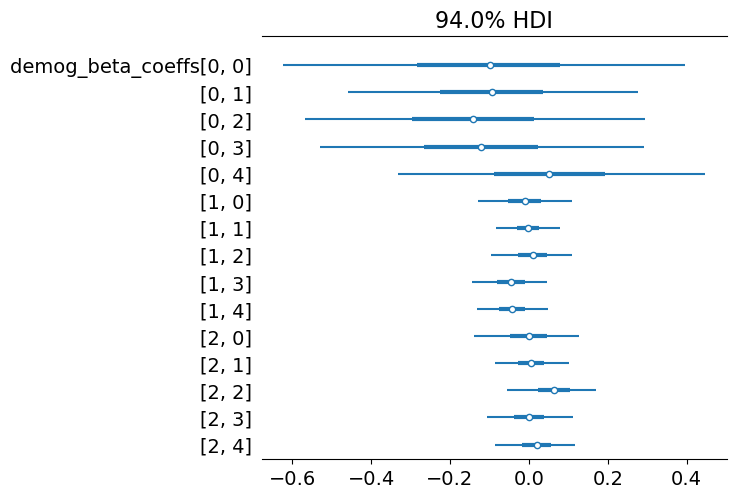

In [41]:
az.plot_forest(fit, var_names=["demog_beta_coeffs"], combined=True)

In [42]:
#If you want the rhat values for beta_my which is a two dimensional array, 
r_hat2(z,'beta_mu',chains)

(12000, 5)


[['beta_mu', 1, 1.001299903172674],
 ['beta_mu', 2, 1.0013137493250504],
 ['beta_mu', 3, 1.0016642491284047],
 ['beta_mu', 4, 1.0011770491362217],
 ['beta_mu', 5, 1.0011427882328385]]

In [43]:
r_hat1(z,'alpha_mu',chains)

(12000,)


['alpha_mu', 1.0011437999630837]

In [44]:
w=WAICf(z['log_lik']) 
#Look at the WAIC, note that my WAIC (produced here) gives the same results canned software for simple models
#However, I have had some divergences for some more complex models, though I am not sure why

In [45]:
#print WAIC
print(f"WAIC: {w}")

WAIC: (          waic         elpd     p_waic1     p_waic2   maxloglik    se_waic
0  2293.662007 -1146.831003  275.755959  349.669285 -825.579857  45.250874, array([[-1.23247658],
       [-0.85806456],
       [-1.27128425],
       ...,
       [-0.98189776],
       [-0.65822977],
       [-1.1553663 ]]))


In [46]:
#import arviz as az

#  pointwise log-likelihood saved in fit
loo_result = az.loo(fit)
print(loo_result)

Computed from 12000 posterior samples and 1608 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1197.93    24.24
p_loo      400.77        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)     1487   92.5%
   (0.70, 1]   (bad)       120    7.5%
   (1, Inf)   (very bad)    1    0.1%



In [47]:
waic_result = az.waic(fit)
print(waic_result)

Computed from 12000 posterior samples and 1608 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1146.80    22.62
p_waic      349.64        -

There has been a warning during the calculation. Please check the results.


In [48]:
betas=[]
for k in range(shape(z['beta'])[2]):
    beta1=[]
    for i in range(shape(z['beta'])[1]):
        beta1+=[float(z['beta'][:,i,k].mean())]
    betas+=[beta1]
betas=(500/60)*frame(betas) .T
betas.columns=beta_mu.columns
#betas

<Axes: ylabel='Frequency'>

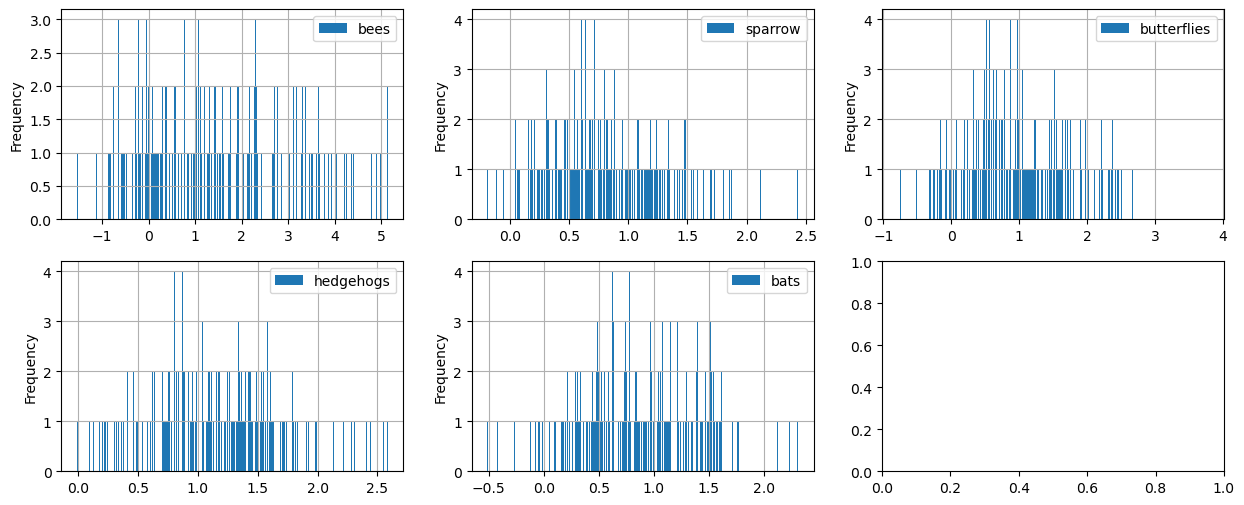

In [49]:
pltsize(6,15)
fig,ax=plt.subplots(2,3)
['bees','sparrow','butterflies','hedgehogs','bats']
betas.plot(kind='hist',y='bees',bins=383,ax=ax[0,0],grid=True)
betas.plot(kind='hist',y='sparrow',bins=383,ax=ax[0,1],grid=True)
betas.plot(kind='hist',y='butterflies',bins=383,ax=ax[0,2],grid=True)
betas.plot(kind='hist',y='hedgehogs',bins=383,ax=ax[1,0],grid=True)
betas.plot(kind='hist',y='bats',bins=383,ax=ax[1,1],grid=True)


In [50]:
exp(1)

2.718281828459045

In [51]:
exp(1+1/2)

4.4816890703380645

In [52]:
x[0]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [53]:
x[2]

array([[-0.05      ,  0.16666667,  0.41666667, ...,  1.        ,
         0.75      ,  0.        ],
       [-1.        ,  0.        ,  0.41666667, ...,  0.25      ,
         0.25      ,  0.        ],
       [-1.        ,  1.        ,  0.75      , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.1       ,  1.        ,  0.        , ...,  0.75      ,
         0.        ,  0.        ],
       [-0.2       ,  0.41666667,  1.        , ...,  0.25      ,
         0.16666667,  0.        ],
       [-0.2       ,  0.16666667,  1.        , ...,  0.16666667,
         0.25      ,  0.        ]])

In [54]:
az.summary(idata, var_names=["beta_ivar", "theta_ivar", "alpha_ivar"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_ivar[0],14.277,3.512,8.259,20.525,0.102,0.072,1166.0,3037.0,1.00
beta_ivar[1],64.262,22.644,27.967,105.775,0.758,0.536,841.0,2000.0,1.01
beta_ivar[2],42.145,16.133,17.820,72.252,0.612,0.433,655.0,1679.0,1.00
beta_ivar[3],63.791,25.592,25.167,112.553,1.107,0.783,487.0,999.0,1.01
beta_ivar[4],60.207,21.905,26.387,101.344,0.725,0.513,893.0,1941.0,1.00
theta_ivar,7.407,1.304,5.049,9.775,0.029,0.020,2066.0,4418.0,1.00
alpha_ivar,2.069,0.922,1.000,3.567,0.038,0.027,596.0,1220.0,1.01
